In [8]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image

In [9]:
imagem = cv2.imread('teclado_doce.PNG')

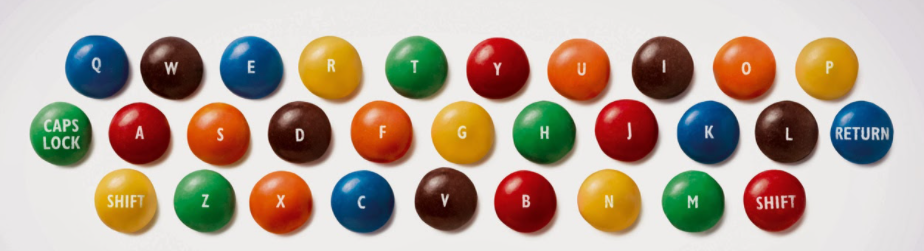

In [10]:
cv2_imshow(imagem)

In [11]:
img_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

In [12]:
b, g, r = cv2.split(img_rgb)

Quando faço o split da imagem teclado_doce RGB.
essa função retorna tres items as três dimensoes de uma imagem RGB.
Onde cada dimensão consiste em um valor em nivel de 0 e 255
que é o nivel de cor de cada dimensão, no caso temos 3 dimensoes contem niveis de cor de azul, verde e vermelho, a junção dessas três matrizes forma a imagem rgb.

BLUE



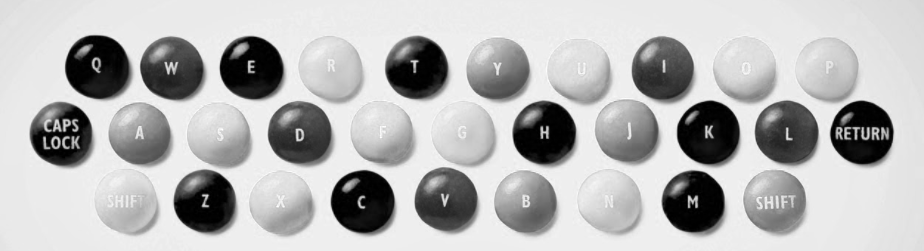

In [13]:
cv2_imshow(b)

GREEN

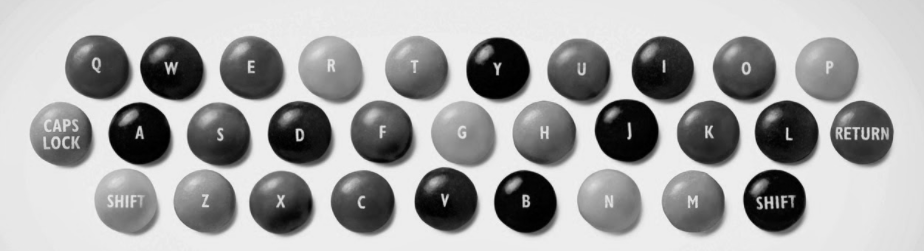

In [14]:
cv2_imshow(g)

RED

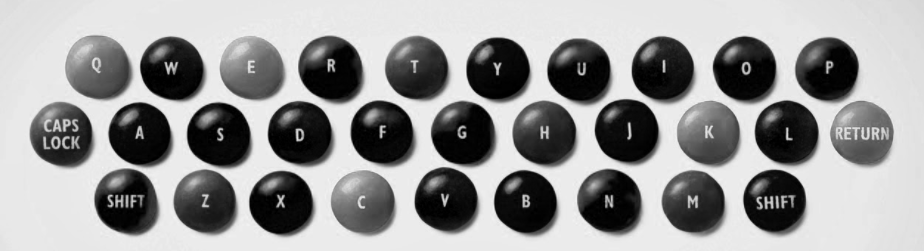

In [15]:
cv2_imshow(r)

## SEGMENTAÇÃO POR COR E IDENTIFICAR QUANTOS OBJETOS TEM EM CADA COR

Lista de cores 

Azul 
inferior 100, 100, 100 superior 140, 255, 255

Verde
inferior 40, 100, 100 superior 80, 255, 255

Vermenlho
inferior 160, 100, 100 superior 200, 255, 255


5


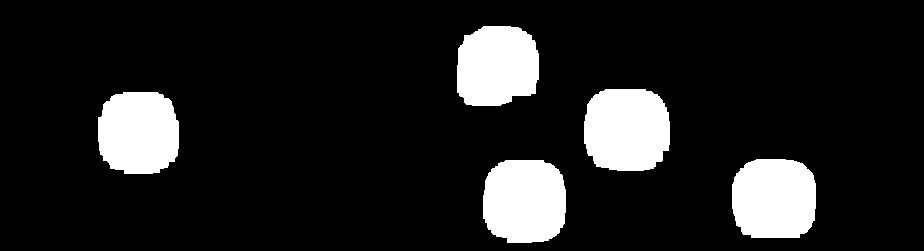

In [16]:
#IMAGEM VERMELHO
#inferior 160, 100, 100 superior 200, 255, 255

limiar_inferior = np.array([160, 80, 70])

limiar_superior = np.array([200, 255, 255])

imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

imagem_segmentada = cv2.inRange(imagem_hsv, limiar_inferior, limiar_superior)
#cv2_imshow(imagem_segmentada)
EE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
imagem_dilate = cv2.dilate(imagem_segmentada, EE, iterations=11)
contornos, _ = cv2.findContours(imagem_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contornos))
cv2_imshow(imagem_dilate)

5


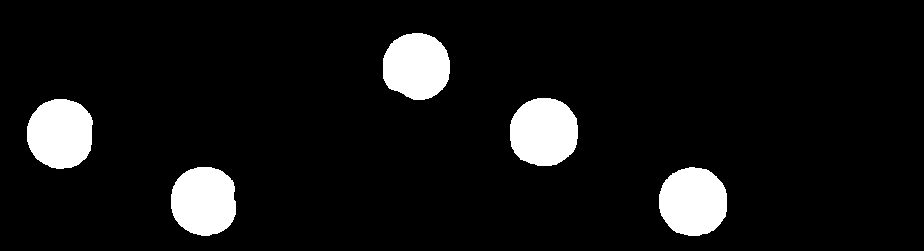

In [17]:
#IMAGEM VERDE
#inferior 40, 100, 100 superior 80, 255, 255

limiar_inferior = np.array([40, 15, 15])

limiar_superior = np.array([80, 255, 255])

imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

imagem_segmentada = cv2.inRange(imagem_hsv, limiar_inferior, limiar_superior)

EE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
imagem_dilate = cv2.dilate(imagem_segmentada, EE, iterations=2)
contornos, _ = cv2.findContours(imagem_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contornos))
cv2_imshow(imagem_dilate)

5


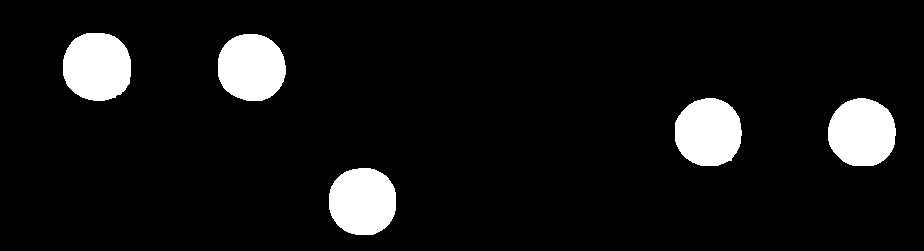

In [18]:
#IMAGEM AZUL

limiar_inferior = np.array([76,50,20])

limiar_superior = np.array([170,255,255])

imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

imagem_segmentada = cv2.inRange(imagem_hsv, limiar_inferior, limiar_superior)

EE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
imagem_dilate = cv2.dilate(imagem_segmentada, EE, iterations=2)
contornos, _ = cv2.findContours(imagem_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contornos))
cv2_imshow(imagem_dilate)

## **2. [60] Realize upload da imagem objetos.png, em seguida realize os seguintes Isto está formatado comO código**


triangulo =  4
retangulo_quadrado =  3
hexagono =  2
pentagono =  2
estrela =  0
circulo =  3


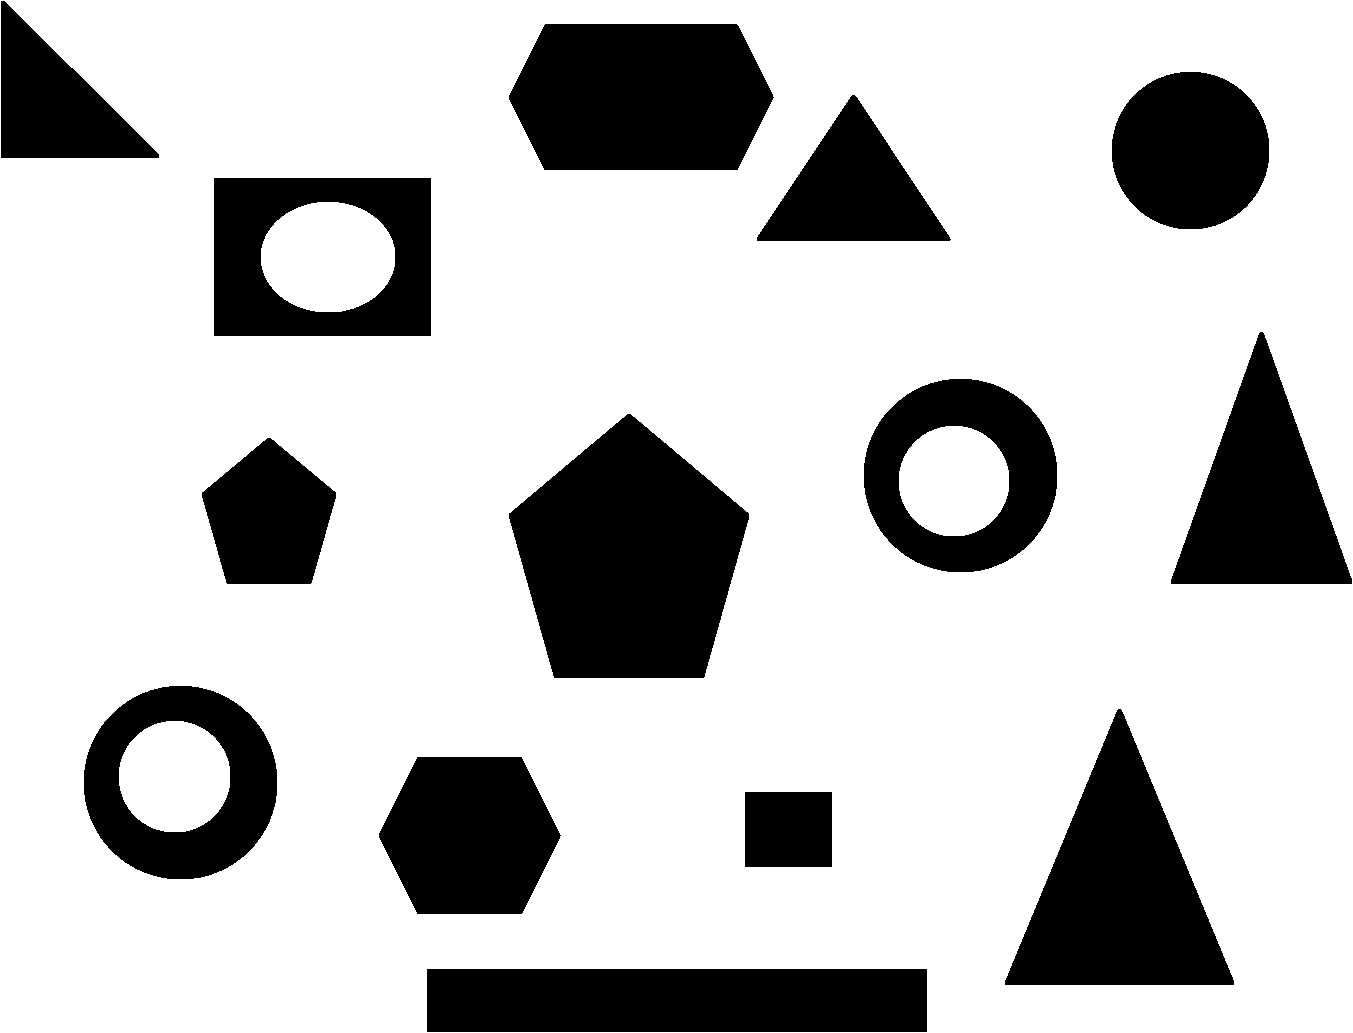

In [26]:
imagem = cv2.imread('objetos.png',0)
ret, imagem_bin = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY)

contorno, hierarquia = cv2.findContours(imagem_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# com base na documentação https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_hierarchy/py_contours_hierarchy.html#exercises
# o retorno da hierarquia do contorno nos traz algumas informações a informaçoes mais relevantes
# no caso é retornado duas listas contendo os contornos e o nivel de hierarquia desse contorno
# por isso na linha abaixo percorro for um utilizando o enumerate para obter o indice ao passo que percorro a  lista contorno
# apos isto utilizo a função arcLegnght para calcular o tamanho do peremitro do obj que estou percorrendo
# para cada contorno é gerado uma lista contendo informações desse contorno e se o mesmo se encontra dentro de outro contorno
# a lista de hierarquia contem em sua ultima posicao o numero que corresponde ao nivel hierarquico que este contorno se encontra

# Para calcular a quantidade de cada objeto temos que calcular utilizando apenas os valores de hierarquia 
# que contem em sua ultima posicao um valor igual a 0, pois se esse valor for -1 se refere a imagem toda o primeiro contorno que seria a imagem todo
# apartir disso todos os contornos nessa imagem returnam uma lista de hierarquia que na ultima posicao contem a hierarquia desta imagem

# Conte a quantidade de cada objeto, neste caso ignore o buraco dentro de alguns objetos. 
triangulo = 0
retangulo_quadrado = 0
hexagono = 0
pentagono = 0
estrela = 0
circulo = 0

# para identificar um circulo utilizo os vertices, mas como é circulo este circulo tem muitos vertices 


for idx, obj in enumerate(contorno):
    perimetro = cv2.arcLength(obj, True)
    poligono = cv2.approxPolyDP(obj, 0.01*perimetro, True)

    if hierarquia[0][idx][-1] == 0:
        vertices = len(poligono)

        if vertices == 3:
            triangulo += 1
        if vertices == 4:
            retangulo_quadrado += 1
        if vertices == 5:
            pentagono += 1
        if vertices == 6:
            hexagono += 1
        if vertices > 10:
            circulo += 1
    

print("triangulo = ",triangulo)
print("retangulo_quadrado = ",retangulo_quadrado)
print("hexagono = ",hexagono)
print("pentagono = ",pentagono)
print("estrela = ",estrela)
print("circulo = ",circulo)
cv2_imshow(imagem_bin)

## b) [10] Qual objeto tem a maior área? Mostre o valor da área e circule o objeto na imagem. 

Qual objeto tem a maior área = retangulo_quadrado


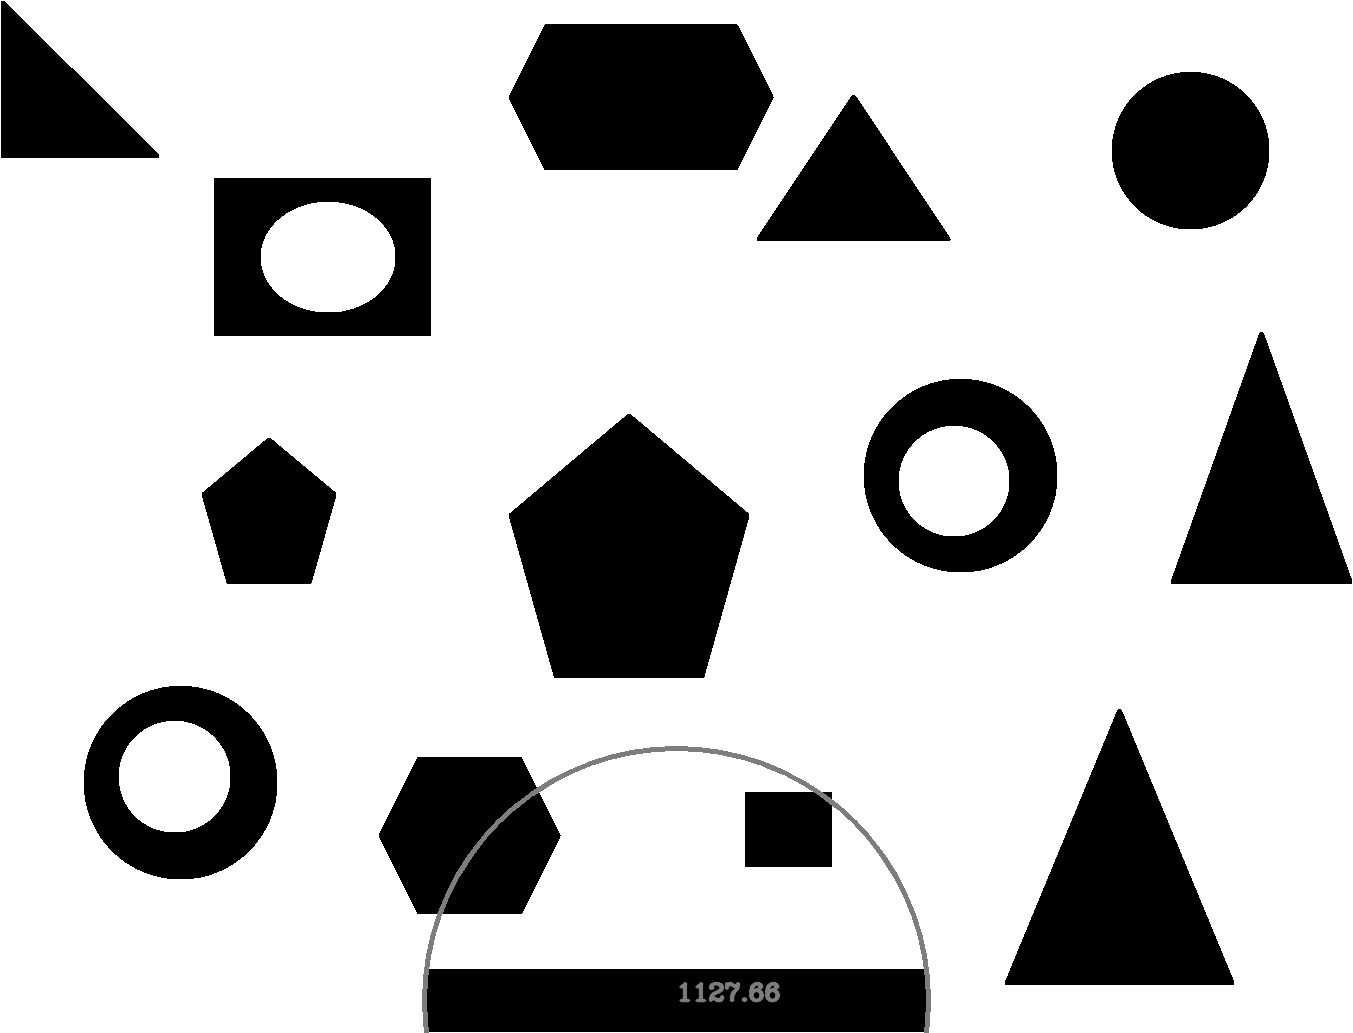

In [25]:

imagem = cv2.imread('objetos.png',0)
ret, imagem_bin = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY)

contorno, hierarquia = cv2.findContours(imagem_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# com base na documentação https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_hierarchy/py_contours_hierarchy.html#exercises
# o retorno da hierarquia do contorno nos traz algumas informações a informaçoes mais relevantes
# no caso é retornado duas listas contendo os contornos e o nivel de hierarquia desse contorno
# por isso na linha abaixo percorro for um utilizando o enumerate para obter o indice ao passo que percorro a  lista contorno
# apos isto utilizo a função arcLegnght para calcular o tamanho do peremitro do obj que estou percorrendo
# para cada contorno é gerado uma lista contendo informações desse contorno e se o mesmo se encontra dentro de outro contorno
# a lista de hierarquia contem em sua ultima posicao o numero que corresponde ao nivel hierarquico que este contorno se encontra

# Para calcular a quantidade de cada objeto temos que calcular utilizando apenas os valores de hierarquia 
# que contem em sua ultima posicao um valor igual a 0, pois se esse valor for -1 se refere a imagem toda o primeiro contorno que seria a imagem todo
# apartir disso todos os contornos nessa imagem returnam uma lista de hierarquia que na ultima posicao contem a hierarquia desta imagem

font = cv2.FONT_HERSHEY_COMPLEX

# para identificar um circulo utilizo os vertices, mas como é circulo este circulo tem muitos vertices 

# Qual objeto tem a maior área? Mostre o valor da área e circule o objeto na imagem. 
nome_maior = ""
centro = (0, 0)
raio = 0

maior = 0
for idx, obj in enumerate(contorno):
    perimetro = cv2.arcLength(obj, True)
    poligono = cv2.approxPolyDP(obj, 0.01*perimetro, True)

    if hierarquia[0][idx][-1] == 0:
        vertices = len(poligono)
        if perimetro > maior: # DECLADO O MAIOR IGUAL A ZERO E COM ISSO VOU VERIFICANDO O TAMANHO DE CADA OIBJET E COLOCANDO NESSE 

            index_maior = idx    
            (x, y), raio = cv2.minEnclosingCircle(obj)
            centro = (int(x), int(y))
            raio = int(raio)
            maior = perimetro
            vertices = len(poligono)
            if vertices == 3:nome_maior = "triangulo"
            if vertices == 4:nome_maior = "retangulo_quadrado"
            if vertices == 5:nome_maior = "pentagono"
            if vertices == 6:nome_maior = "hexagono"
            if vertices > 10:nome_maior = "circulo"


print(f"Qual objeto tem a maior área = {nome_maior}")
cv2.circle(imagem_bin, centro, raio, 125, 4)

cv2.putText(imagem_bin, str(format(maior, '.2f')), centro, font, 0.8, 125, 2, cv2.LINE_AA)
cv2_imshow(imagem_bin)

 ## Trace uma linha entre o centroide de cada objeto com buraco.

 ##  Qual é o perímetro do triângulo criado?

2056


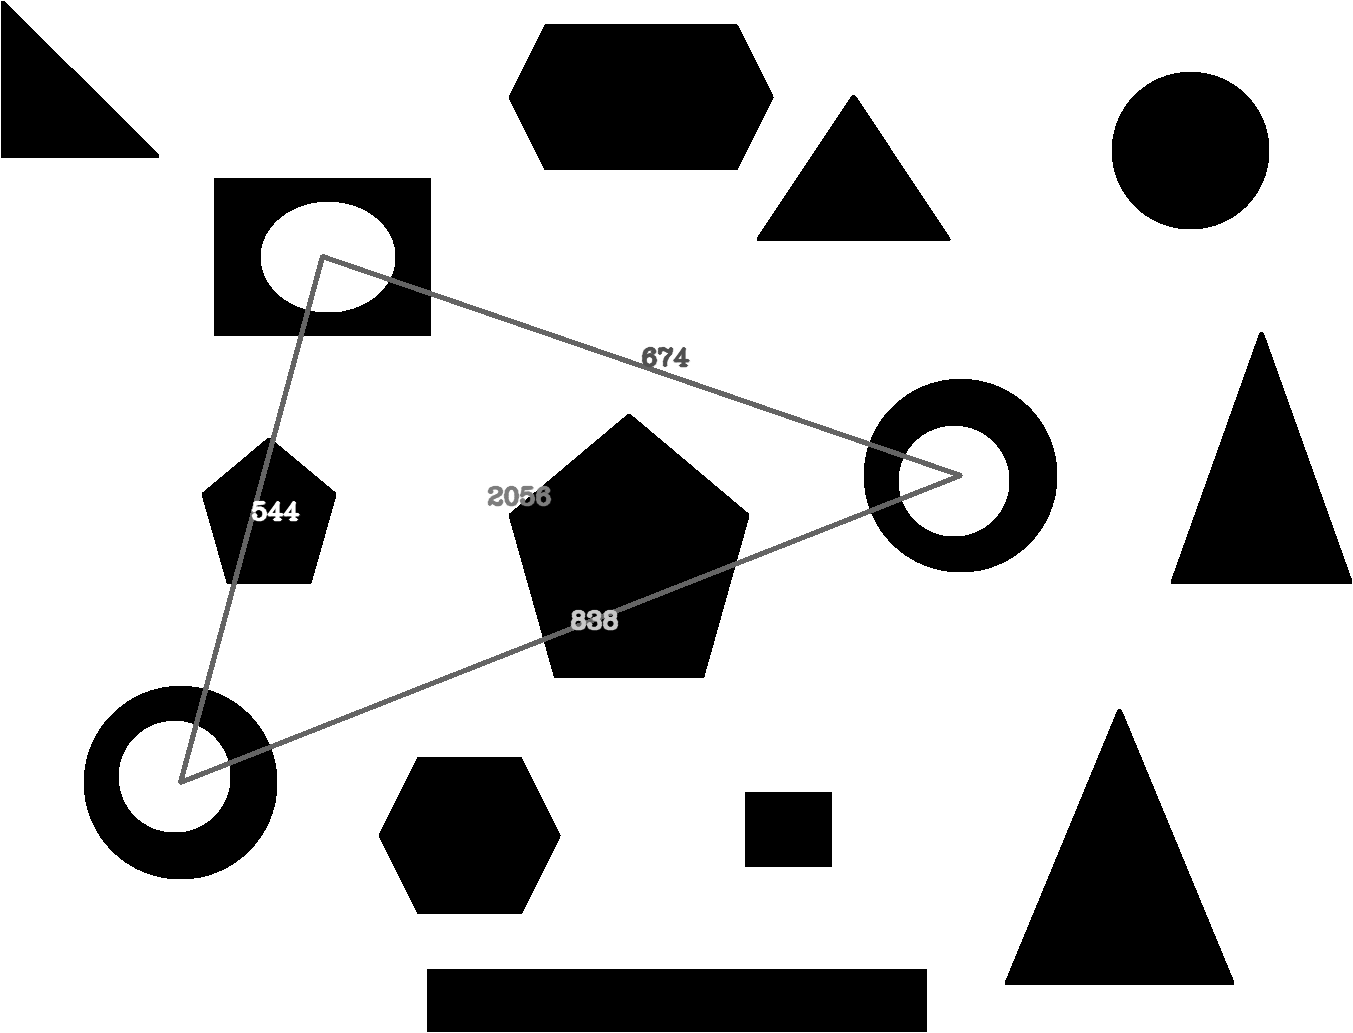

In [23]:
imagem = cv2.imread('objetos.png',0)
ret, imagem_bin = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY)

contorno, hierarquia = cv2.findContours(imagem_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# com base na documentação https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_hierarchy/py_contours_hierarchy.html#exercises
# o retorno da hierarquia do contorno nos traz algumas informações a informaçoes mais relevantes
# no caso é retornado duas listas contendo os contornos e o nivel de hierarquia desse contorno
# por isso na linha abaixo percorro for um utilizando o enumerate para obter o indice ao passo que percorro a  lista contorno
# apos isto utilizo a função arcLegnght para calcular o tamanho do peremitro do obj que estou percorrendo
# para cada contorno é gerado uma lista contendo informações desse contorno e se o mesmo se encontra dentro de outro contorno
# a lista de hierarquia contem em sua ultima posicao o numero que corresponde ao nivel hierarquico que este contorno se encontra

# Para calcular a quantidade de cada objeto temos que calcular utilizando apenas os valores de hierarquia 
# que contem em sua ultima posicao um valor igual a 0, pois se esse valor for -1 se refere a imagem toda o primeiro contorno que seria a imagem todo
# apartir disso todos os contornos nessa imagem returnam uma lista de hierarquia que na ultima posicao contem a hierarquia desta imagem


# para identificar um circulo utilizo os vertices, mas como é circulo este circulo tem muitos vertices 

# Qual objeto tem a maior área? Mostre o valor da área e circule o objeto na imagem. 
lista = []
for idx, obj in enumerate(contorno):
    perimetro = cv2.arcLength(obj, True)
    poligono = cv2.approxPolyDP(obj, 0.01*perimetro, True)

    if hierarquia[0][idx][-1] != 0 and hierarquia[0][idx][-1] != -1: # neste treixo pego os contornos que tem nivel de hierarquia apartir disso pego o indice do nivel de hierarquia desse contorno
        momento = cv2.moments(contorno[hierarquia[0][idx][-1]])  #  NESTE CASO QUANDO IDENTIFICO UMA IMAGEM QUE TEM HIERARQUIA PEGO A IMAGEM ANTERIOR A ESSA QUE É O CONTORNO PAI DESSA IMAGEM QUE TINHA HIERARQUIA DA ANTERIOR

        #FAÇO ISSO PORQUE NO EXERCICIO ESTA PROPOSTO QUE TRAÇAMOS UMA LINHA 

        c1x = int(momento['m10'] / momento['m00'])
        c1y = int(momento['m01'] / momento['m00'])

        lista.append((c1x, c1y))



cv2.line(imagem_bin, lista[0], lista[1], 100, 3) 
cv2.line(imagem_bin, lista[0], lista[2], 100, 3)
cv2.line(imagem_bin, lista[1], lista[2], 100, 3) 

##############################################################################################

# CALCULANDO DISTANCIA DE RETA

distancia_1 = int(np.sqrt(((lista[1][0]-lista[0][0])**2) + ((lista[1][1]-lista[0][1])**2)))

pos_1 = int((lista[0][0] + lista[1][0])/2)

pos_2 = int((lista[0][1] + lista[1][1])/2)

cv2.putText(imagem_bin, str(distancia_1), (pos_1, pos_2), font, 0.8, 200, 2, cv2.LINE_AA)

##############################################################################################

# CALCULANDO DISTANCIA DE RETA

distancia_2 = int(np.sqrt(((lista[1][0]-lista[2][0])**2) + ((lista[1][1]-lista[2][1])**2)))

pos_3 = int((lista[2][0] + lista[1][0])/2)

pos_4 = int((lista[2][1] + lista[1][1])/2)

cv2.putText(imagem_bin, str(distancia_2), (pos_3, pos_4), font, 0.8, 80, 2, cv2.LINE_AA)

##############################################################################################

# CALCULANDO DISTANCIA DE RETA

distancia_3 = int(np.sqrt(((lista[0][0]-lista[2][0])**2) + ((lista[0][1]-lista[2][1])**2)))

pos_5 = int((lista[2][0] + lista[0][0])/2)

pos_6 = int((lista[2][1] + lista[0][1])/2)

cv2.putText(imagem_bin, str(distancia_3), (pos_5, pos_6), font, 0.8, 255, 2, cv2.LINE_AA)

##############################################################################################

# CALCULANDO CENTRO TRIANGULO E SOMANDO DISTANCIA DE RETAS PARA ENCONTRAR PERIMETRO DO TRIANGULO

pos_7 = int((lista[0][0]+ lista[1][0] + lista[2][0])/3)

pos_8 = int((lista[0][1]+ lista[1][1] + lista[2][1])/3)

perimetro_triangulo = distancia_1 + distancia_2 + distancia_3

cv2.putText(imagem_bin, str(perimetro_triangulo), (pos_7, pos_8), font, 0.8, 125, 2, cv2.LINE_AA)

print(perimetro_triangulo)
cv2_imshow(imagem_bin)